In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path ='data/OBS_ASOS_TIM_20250115161100.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.dtypes

지점          int64
지점명        object
일시         object
기온(°C)    float64
dtype: object

In [3]:
365 * 24 * 2

17520

In [4]:
w_data = df[['지점명', '일시', '기온(°C)']]
w_data

,지점명,일시,기온(°C)
0,서울,2023-01-01 01:00,1.5
1,서울,2023-01-01 02:00,1.5
2,서울,2023-01-01 03:00,1.6
3,서울,2023-01-01 04:00,1.5
4,서울,2023-01-01 05:00,0.8
...,...,...,...
17466,광주,2023-12-30 20:00,6.3
17467,광주,2023-12-30 21:00,6.5
17468,광주,2023-12-30 22:00,6.6
17469,광주,2023-12-30 23:00,6.1


In [5]:
df_seoul = df[w_data['지점명'] == '서울']
df_gj = df[w_data['지점명'] == '광주']

In [6]:
print(df_seoul)
print(df_gj)

       지점 지점명                일시  기온(°C)
0     108  서울  2023-01-01 01:00     1.5
1     108  서울  2023-01-01 02:00     1.5
2     108  서울  2023-01-01 03:00     1.6
3     108  서울  2023-01-01 04:00     1.5
4     108  서울  2023-01-01 05:00     0.8
...   ...  ..               ...     ...
8731  108  서울  2023-12-30 20:00     1.4
8732  108  서울  2023-12-30 21:00     1.6
8733  108  서울  2023-12-30 22:00     1.7
8734  108  서울  2023-12-30 23:00     1.9
8735  108  서울  2023-12-31 00:00     2.1

[8736 rows x 4 columns]
        지점 지점명                일시  기온(°C)
8736   156  광주  2023-01-01 01:00    -0.5
8737   156  광주  2023-01-01 02:00    -0.7
8738   156  광주  2023-01-01 03:00    -0.9
8739   156  광주  2023-01-01 04:00    -1.5
8740   156  광주  2023-01-01 05:00    -1.6
...    ...  ..               ...     ...
17466  156  광주  2023-12-30 20:00     6.3
17467  156  광주  2023-12-30 21:00     6.5
17468  156  광주  2023-12-30 22:00     6.6
17469  156  광주  2023-12-30 23:00     6.1
17470  156  광주  2023-12-31 00:00     6.0

[8

In [7]:
print(len(df_seoul))
print(len(df_gj))

8736
8735


In [8]:
temp = []
for i in df_seoul['일시']:
    temp.append(i.split(" ")[0]) #  2023-01-01 01:00 형태의 값을 공백으로 잘라서 temp 리스트에 저장

lack_seoul = [] #  24개가 안되는 날을 저장할 리스트
uni_temp = set(temp) #  temp리스트 중복 제거 

for i in uni_temp: #  중복제거된 날짜 반복문을 통해서 
    if temp.count(i) != 24: #  특정 날짜의 개수가 24개가 아니면 
        lack_seoul.append(i) #  문제가 있는 날짜를 lack_seoul에 저장 

print(lack_seoul)

['2023-12-31', '2023-01-01']


In [9]:
temp = []
for i in df_gj['일시']:
    temp.append(i.split(" ")[0]) #  2023-01-01 01:00 형태의 값을 공백으로 잘라서 temp 리스트에 저장

lack_gj = [] #  24개가 안되는 날을 저장할 리스트
uni_temp = set(temp) #  temp리스트 중복 제거 

for i in uni_temp: #  중복제거된 날짜 반복문을 통해서 
    if temp.count(i) != 24: #  특정 날짜의 개수가 24개가 아니면 
        lack_gj.append(i) #  문제가 있는 날짜를 lack_seoul에 저장 

print(lack_gj)

['2023-12-31', '2023-12-14', '2023-01-01']


In [10]:
lack_data = lack_seoul + lack_gj
lack_data

for i in lack_data: #  문제가 있는 날짜를 반복문으로 데이터프레임 재구성
    df_seoul = df_seoul[df_seoul['일시'].str.split(" ").str[0] != i] #  
    df_gj = df_gj[df_gj['일시'].str.split(" ").str[0] != i]

In [11]:
print(len(df_seoul))
print(len(df_gj))

8688
8688


In [12]:
## 인덱스 리셋 및 컬럼 드랍

In [13]:
df_seoul.reset_index(inplace=True)
df_seoul = df_seoul.drop('index', axis=1)
df_seoul.head()

,지점,지점명,일시,기온(°C)
0,108,서울,2023-01-02 00:00,-4.3
1,108,서울,2023-01-02 01:00,-5.0
2,108,서울,2023-01-02 02:00,-5.6
3,108,서울,2023-01-02 03:00,-6.2
4,108,서울,2023-01-02 04:00,-6.6


In [14]:
df_gj.reset_index(inplace=True)
df_gj = df_gj.drop('index', axis=1)
df_gj.head()

,지점,지점명,일시,기온(°C)
0,156,광주,2023-01-02 00:00,-0.5
1,156,광주,2023-01-02 01:00,-0.9
2,156,광주,2023-01-02 02:00,-0.8
3,156,광주,2023-01-02 03:00,0.1
4,156,광주,2023-01-02 04:00,-0.1


In [77]:
times = [f"{hour:02d}:00" for hour in range(24)]

zeros = np.zeros((24,2))
df = pd.DataFrame(zeros, index=times, columns=['seoul', 'gwangju'])
df.head()

,seoul,gwangju
00:00,0.0,0.0
01:00,0.0,0.0
02:00,0.0,0.0
03:00,0.0,0.0
04:00,0.0,0.0


In [16]:
df_gj.loc[:23, '일시':]

,일시,기온(°C)
0,2023-01-02 00:00,-0.5
1,2023-01-02 01:00,-0.9
2,2023-01-02 02:00,-0.8
3,2023-01-02 03:00,0.1
4,2023-01-02 04:00,-0.1
5,2023-01-02 05:00,-0.1
6,2023-01-02 06:00,-1.9
7,2023-01-02 07:00,-2.3
8,2023-01-02 08:00,-2.3
9,2023-01-02 09:00,-1.0


In [17]:
df_gj.loc[:23, '기온(°C)'].idxmax()

14

In [18]:

# 날짜별 가장 큰 날 찾기 
# [0:23]
# [24:47]
# [48:71]


In [79]:
df_gj.loc[0:23, '기온(°C)'].idxmax()

max_idx = []
for i in range(0, len(df_gj), 24):
    end = i+23
    max_idx.append(df_gj.loc[i:end, '기온(°C)'].idxmax())
    #hour = df_gj['일시'].str.split(" ").str[1]

for idx in max_idx:
    hour = df_gj.loc[idx, '일시'].split(" ")[1]
    #print(hour)
    df.loc[hour, 'gwangju'] += 1



In [81]:
df

,seoul,gwangju
00:00,0.0,17.0
01:00,0.0,4.0
02:00,0.0,1.0
03:00,0.0,0.0
04:00,0.0,1.0
05:00,0.0,0.0
06:00,0.0,0.0
07:00,0.0,1.0
08:00,0.0,1.0
09:00,0.0,1.0


In [83]:
max_idx = []
for i in range(0, len(df_seoul), 24):
    end = i+23
    max_idx.append(df_seoul.loc[i:end, '기온(°C)'].idxmax())

for idx in max_idx:
    hour = df_seoul.loc[idx, '일시'].split(" ")[1]
    df.loc[hour, 'seoul'] += 1


In [85]:
df

,seoul,gwangju
00:00,26.0,17.0
01:00,1.0,4.0
02:00,1.0,1.0
03:00,1.0,0.0
04:00,0.0,1.0
05:00,0.0,0.0
06:00,0.0,0.0
07:00,1.0,1.0
08:00,0.0,1.0
09:00,2.0,1.0


In [123]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import warnings

In [137]:
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
font_path = 'data/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['figure.figsize'] = (8, 4)

<Axes: >

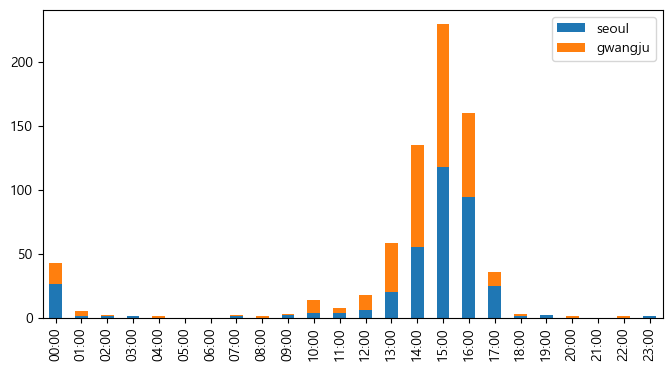

In [152]:
df.plot(kind='bar', stacked=True)

In [172]:
df.head()

,seoul,gwangju
00:00,26.0,17.0
01:00,1.0,4.0
02:00,1.0,1.0
03:00,1.0,0.0
04:00,0.0,1.0


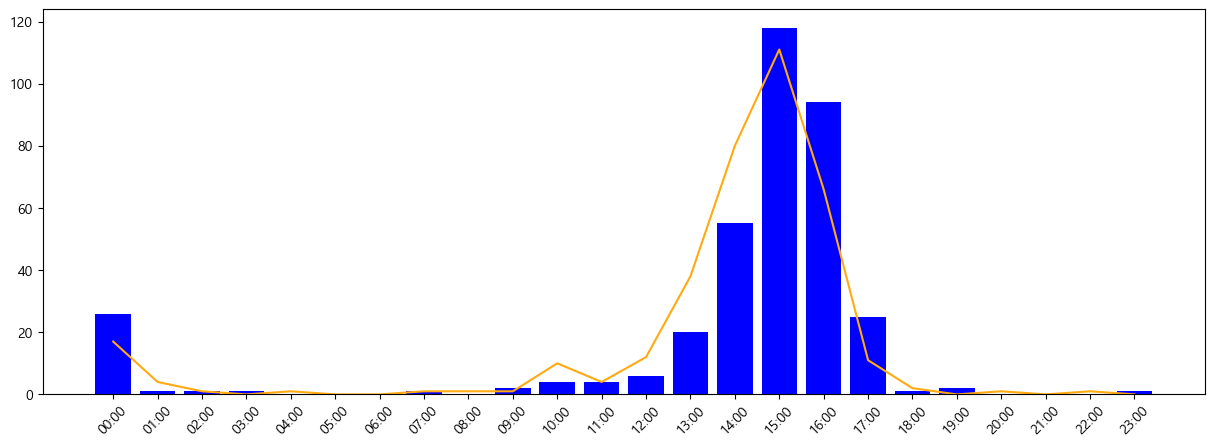

In [198]:
plt.figure(figsize=(15, 5))
plt.bar(df.index, df['seoul'], color='blue')
plt.plot(df.index, df['gwangju'], color='#fa1')


plt.xticks(rotation=45)
#plt.legend(loc=)
#plt.legend(['광주', '서울'])
plt.show()